In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Continuing from Project_EDA-Numeric.ipynb,
Now, since the model has been cleaned and split into train and test, I will use the Random forrest clasifier to predict the out puts of the test file. Then I will compare these predicted outputs with the actual values. 

This will tell me whether my predicting model is efficient enough to predict similar results in future with new data.

In [2]:
df = pd.read_csv("Project_train.csv")

In [3]:
df.head()

,STATE,ST_CASE,PER_NO,DAY,MONTH,RUR_URB,AGE,SEX,PER_TYP,INJ_SEV,...,DRUGRES1,DRUGRES2,DRUGRES3,DOA,DEATH_DA,DEATH_MO,WORK_INJ,HISPANIC,RACE,both
0,California,60672,1,3,April,1,63.0,2,1,0,...,0,0,0,0,88,88,8,0,0,0
1,Mississippi,280469,3,24,October,1,16.0,1,2,5,...,0,0,0,0,88,88,8,0,0,0
2,Texas,482422,1,6,October,1,60.0,1,1,0,...,0,0,0,0,88,88,8,0,0,0
3,Massachusetts,250047,1,3,May,2,43.0,1,1,4,...,996,996,0,7,3,5,0,7,1,0
4,Virginia,510133,1,3,April,1,26.0,2,1,4,...,1,0,0,0,3,4,0,7,1,0


In [4]:
df.columns

Index([u'STATE', u'ST_CASE', u'PER_NO', u'DAY', u'MONTH', u'RUR_URB', u'AGE',
       u'SEX', u'PER_TYP', u'INJ_SEV', u'DRINKING', u'ALC_DET', u'ALC_STATUS',
       u'ATST_TYP', u'ALC_RES', u'DRUGS', u'DRUGRES1', u'DRUGRES2',
       u'DRUGRES3', u'DOA', u'DEATH_DA', u'DEATH_MO', u'WORK_INJ', u'HISPANIC',
       u'RACE', u'both'],
      dtype='object')

In [5]:
X =df

In [6]:
#Dropping categorical vraibles
X = X.drop(['STATE','ST_CASE','MONTH'], axis=1)

In [7]:
#Setting the feature we want to predict
y = X.pop("both")

In [8]:
X.describe()

,PER_NO,DAY,RUR_URB,AGE,SEX,PER_TYP,INJ_SEV,DRINKING,ALC_DET,ALC_STATUS,...,DRUGS,DRUGRES1,DRUGRES2,DRUGRES3,DOA,DEATH_DA,DEATH_MO,WORK_INJ,HISPANIC,RACE
count,60440.000000,60440.000000,60440.000000,60440.000000,60440.000000,60440.000000,60440.000000,60440.000000,60440.000000,60440.000000,...,60440.000000,60440.000000,60440.000000,60440.000000,60440.000000,60440.000000,60440.000000,60440.000000,60440.000000,60440.000000
mean,1.633190,15.539394,1.977747,39.106672,1.330079,1.709001,3.133240,4.000579,7.988683,0.748379,...,4.602879,111.716959,50.940040,23.497799,1.775364,56.701737,52.861995,4.964841,9.596658,7.406486
std,1.868153,8.787640,1.749861,20.113963,0.470245,1.282497,1.867737,3.915475,2.463594,0.967834,...,4.046566,287.084794,212.436725,146.977528,3.051544,36.312633,40.294944,3.872439,25.352750,25.003234
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,8.000000,1.000000,23.000000,1.000000,1.000000,3.000000,0.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,8.000000,0.000000,0.000000,0.000000
50%,1.000000,15.000000,2.000000,37.000000,1.000000,1.000000,4.000000,1.000000,9.000000,0.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,88.000000,88.000000,8.000000,0.000000,0.000000
75%,2.000000,23.000000,2.000000,54.000000,2.000000,2.000000,4.000000,8.000000,9.000000,2.000000,...,8.000000,1.000000,0.000000,0.000000,7.000000,88.000000,88.000000,8.000000,7.000000,1.000000
max,51.000000,31.000000,8.000000,114.000000,2.000000,7.000000,5.000000,8.000000,9.000000,2.000000,...,9.000000,996.000000,996.000000,996.000000,8.000000,88.000000,88.000000,8.000000,99.000000,98.000000


In [9]:
#Splitting the training data into training and test sets for building the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [10]:
#Test data, I will use this data to predicit the final values with the model
df1 = pd.read_csv("Project_test.csv")

In [11]:
T = df1

In [12]:
T.head()

,STATE,ST_CASE,PER_NO,DAY,MONTH,RUR_URB,AGE,SEX,PER_TYP,INJ_SEV,...,DRUGS,DRUGRES1,DRUGRES2,DRUGRES3,DOA,DEATH_DA,DEATH_MO,WORK_INJ,HISPANIC,RACE
0,Alabama,10004,1,4,January,1,40.0,1,1,4,...,9,1,0,0,7,4,1,0,7,1
1,Alabama,10005,1,7,January,2,60.0,1,1,0,...,0,1,0,0,0,88,88,8,0,0
2,Alabama,10006,1,8,January,1,64.0,1,1,4,...,0,0,0,0,0,8,1,0,7,1
3,Alabama,10007,1,8,January,2,80.0,1,1,4,...,8,0,0,0,0,8,1,0,7,1
4,Alabama,10010,1,5,January,1,64.0,1,1,3,...,0,0,0,0,0,88,88,8,0,0


In [13]:
#Dropping categorical vraibles
T = T.drop(['STATE','ST_CASE','MONTH'], axis=1)

In [14]:
T.describe()

,PER_NO,DAY,RUR_URB,AGE,SEX,PER_TYP,INJ_SEV,DRINKING,ALC_DET,ALC_STATUS,...,DRUGS,DRUGRES1,DRUGRES2,DRUGRES3,DOA,DEATH_DA,DEATH_MO,WORK_INJ,HISPANIC,RACE
count,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000,20147.00000,20147.000000,20147.000000,20147.000000,20147.000000,...,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000
mean,1.616816,15.472279,1.951358,39.169461,1.331613,1.70343,3.141907,3.972204,7.956073,0.754355,...,4.561523,110.696580,51.530749,23.056882,1.771678,56.942572,53.182856,4.979550,9.452524,7.287934
std,1.733366,8.769564,1.704991,20.074869,0.470804,1.27584,1.863682,3.913416,2.498785,0.969384,...,4.049998,286.511058,213.682660,144.809578,3.050029,36.329437,40.246356,3.869557,25.148765,24.823684
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,8.000000,1.000000,23.000000,1.000000,1.00000,3.000000,0.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,8.000000,0.000000,0.000000,0.000000
50%,1.000000,15.000000,2.000000,37.000000,1.000000,1.00000,4.000000,1.000000,9.000000,0.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,88.000000,88.000000,8.000000,0.000000,0.000000
75%,2.000000,23.000000,2.000000,54.000000,2.000000,2.00000,4.000000,8.000000,9.000000,2.000000,...,8.000000,1.000000,0.000000,0.000000,7.000000,88.000000,88.000000,8.000000,7.000000,1.000000
max,46.000000,31.000000,8.000000,114.000000,2.000000,7.00000,5.000000,8.000000,9.000000,2.000000,...,9.000000,996.000000,996.000000,996.000000,8.000000,88.000000,88.000000,8.000000,99.000000,98.000000


### GRID Search

First I will start with a small number of tress and run the grid search.
After I get the the optimal parameters I will increase the number of trees and run the classifier again to get the model.

In [16]:
#grid search to find best parameters for RFC
n_estimators = [50]
max_features = ['auto','log2']
min_samples_split = [1,2,3,4,5,6,7]
max_depth = [None, 10, 5]
criterion = ['entropy', 'gini']


rfc = RandomForestClassifier(n_jobs=3)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split, max_depth=max_depth, criterion=criterion
                              ), cv=None, n_jobs=1)

In [17]:
# Running Grid search
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [1, 2, 3, 4, 5, 6, 7], 'max_features': ['auto', 'log2'], 'criterion': ['entropy', 'gini'], 'max_depth': [None, 10, 5], 'n_estimators': [50]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [18]:
# best features for the model
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
best_rfc = estimator.best_estimator_

In [20]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print ("Accuracy: ", accuracy)

('Accuracy: ', 0.99867637326273995)


In [21]:
#Running the model with best features and with large number of trees
model = RandomForestClassifier(n_estimators=2000, max_depth=None, max_features='auto',
                               min_samples_split=6, criterion='entropy', n_jobs=3, oob_score=True)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=3,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [37]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(model, X, y, cv=10)

In [38]:
scores

array([ 0.99851117,  0.99851117,  0.99884202,  0.99851117,  0.99884202,
        0.99950356,  0.99801423,  0.9991726 ,  0.9991726 ,  0.99867615])

In [39]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print ("Score is %f +/-  %f" % (mean_score, ci))


Score is 0.998776 +/-  0.000291


In [25]:
#predicting for y=1 in test set
y_hat = model.predict(T)

In [26]:
#preticted outputs 
y_hat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
#Adding the predictied values to the test set.
T['both']=y_hat

In [34]:
#Reading the test set with actual output values
T1 = pd.read_csv("Project_test_OP.csv")

In [35]:
#converting the output into an array
K = T1['both'].as_matrix()

### Confusion matrix

In [36]:
print (confusion_matrix(K, y_hat))

[[19838     0]
 [   20   289]]


### Accuracy for predicited output

accuracy = (289/309)*100

accuracy = 93.53%

In [32]:
#AUC score of predicted output with respect to the actual output
roc = roc_auc_score(K, y_hat)
print ("AUC Score: ", roc)

('AUC Score: ', 0.96763754045307437)


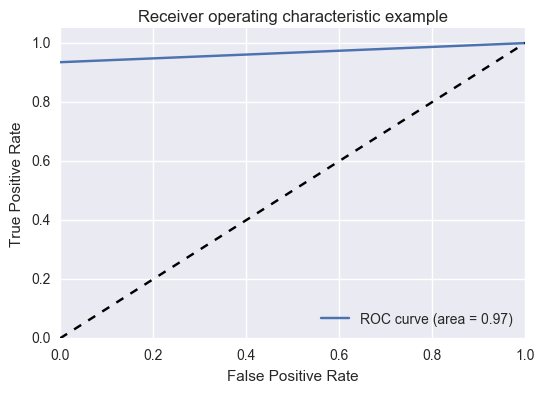

In [33]:
#ROC curve for predicted output vs actual output
fpr, tpr, thresholds = roc_curve(K,y_hat)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### We have found the model gives and accuracy of 93.53% and an ROC of 0.97. 
These results are pretty satisfactory considering the fact a lot of data was discarded for computational speed gain.
It is safe to say that the model will very likely predict if a person involved in a fatal crash had alcohol in his/her system and had used Marijuana prior to the crash.

In [57]:
T1

,STATE,ST_CASE,PER_NO,DAY,MONTH,RUR_URB,AGE,SEX,PER_TYP,INJ_SEV,...,DRUGRES1,DRUGRES2,DRUGRES3,DOA,DEATH_DA,DEATH_MO,WORK_INJ,HISPANIC,RACE,both
0,Alabama,10004,1,4,January,1,40.00,1,1,4,...,1,0,0,7,4,1,0,7,1,0
1,Alabama,10005,1,7,January,2,60.00,1,1,0,...,1,0,0,0,88,88,8,0,0,0
2,Alabama,10006,1,8,January,1,64.00,1,1,4,...,0,0,0,0,8,1,0,7,1,0
3,Alabama,10007,1,8,January,2,80.00,1,1,4,...,0,0,0,0,8,1,0,7,1,0
4,Alabama,10010,1,5,January,1,64.00,1,1,3,...,0,0,0,0,88,88,8,0,0,0
5,Alabama,10011,1,7,January,2,17.00,1,1,0,...,1,0,0,0,88,88,8,0,0,0
6,Alabama,10011,1,7,January,2,42.00,2,1,4,...,1,0,0,7,7,1,0,7,1,0
7,Alabama,10012,1,9,January,2,23.00,2,1,5,...,1,0,0,0,88,88,8,0,0,0
8,Alabama,10016,1,13,January,2,60.00,1,1,0,...,0,0,0,0,88,88,8,0,0,0
9,Alabama,10022,2,26,January,1,66.00,1,2,3,...,0,0,0,0,88,88,8,0,0,0


In [61]:
#Re assigning the categorical variables
T['STATE'] =T1['STATE']
T['ST_CASE']=T1['ST_CASE']
T['MONTH']= T1['MONTH']

In [62]:
T

,PER_NO,DAY,RUR_URB,AGE,SEX,PER_TYP,INJ_SEV,DRINKING,ALC_DET,ALC_STATUS,...,DOA,DEATH_DA,DEATH_MO,WORK_INJ,HISPANIC,RACE,both,STATE,ST_CASE,MONTH
0,1,4,1,40.00,1,1,4,1,9,2,...,7,4,1,0,7,1,0,Alabama,10004,January
1,1,7,2,60.00,1,1,0,0,9,2,...,0,88,88,8,0,0,0,Alabama,10005,January
2,1,8,1,64.00,1,1,4,0,9,0,...,0,8,1,0,7,1,0,Alabama,10006,January
3,1,8,2,80.00,1,1,4,8,9,0,...,0,8,1,0,7,1,0,Alabama,10007,January
4,1,5,1,64.00,1,1,3,0,9,0,...,0,88,88,8,0,0,0,Alabama,10010,January
5,1,7,2,17.00,1,1,0,0,9,2,...,0,88,88,8,0,0,0,Alabama,10011,January
6,1,7,2,42.00,2,1,4,0,9,2,...,7,7,1,0,7,1,0,Alabama,10011,January
7,1,9,2,23.00,2,1,5,8,9,2,...,0,88,88,8,0,0,0,Alabama,10012,January
8,1,13,2,60.00,1,1,0,0,9,0,...,0,88,88,8,0,0,0,Alabama,10016,January
9,2,26,1,66.00,1,2,3,8,9,0,...,0,88,88,8,0,0,0,Alabama,10022,January


In [60]:
T.to_csv('Project_predictions.csv', index= False)

### COntinuing further analyisis on Project_analysis.ipynb